# Diabetes prediction Using SVM,Logistic Regression,Decision Tree,RandomForest and MLP

    

In [1]:
from  pymongo import MongoClient
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = MongoClient("localhost",27017)

In [3]:
# Lets see the data name
client.list_database_names()

['Adam',
 'MapreduceDatabase',
 'MyDataBase',
 'MyExam',
 'NewDatabase',
 'admin',
 'config',
 'iotsystem',
 'local',
 'newData',
 'nodedatabase',
 'test']

In [4]:
db = client.Adam

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Adam')

In [6]:
sell_coll = db.list_collection_names()

In [7]:
sell_coll

['diabetes']

In [8]:
data = db['diabetes']

In [9]:
print(data)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Adam'), 'diabetes')


In [10]:
doc = db.diabetes.find().count()

F:\AnacondaFiles\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


In [11]:
print(doc)

768


In [12]:
data.find()

In [248]:
datalist  = list(data.find())

In [250]:
df = pd.DataFrame(datalist)

In [251]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Age                         768 non-null int64
BMI                         768 non-null float64
BloodPressure               768 non-null int64
DiabetesPedigreeFunction    768 non-null float64
Glucose                     768 non-null int64
Insulin                     768 non-null int64
Outcome                     768 non-null int64
Pregnancies                 768 non-null int64
SkinThickness               768 non-null int64
_id                         768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [253]:
df.describe()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,31.992578,69.105469,0.471876,120.894531,79.799479,0.348958,3.845052,20.536458
std,11.760232,7.884160,19.355807,0.331329,31.972618,115.244002,0.476951,3.369578,15.952218
min,21.000000,0.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,27.300000,62.000000,0.243750,99.000000,0.000000,0.000000,1.000000,0.000000
50%,29.000000,32.000000,72.000000,0.372500,117.000000,30.500000,0.000000,3.000000,23.000000
75%,41.000000,36.600000,80.000000,0.626250,140.250000,127.250000,1.000000,6.000000,32.000000
max,81.000000,67.100000,122.000000,2.420000,199.000000,846.000000,1.000000,17.000000,99.000000


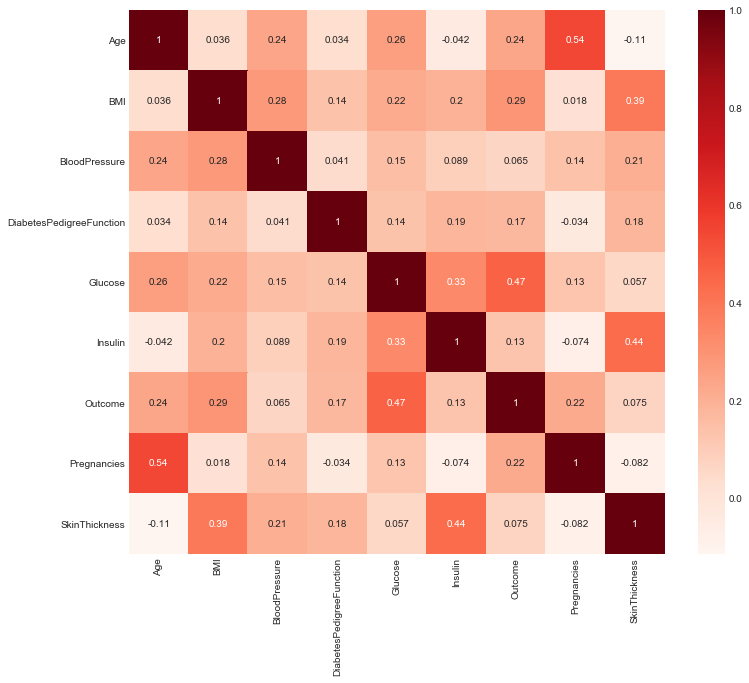

In [225]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [139]:
neg,pos = df['Outcome'].value_counts()
print(neg)
print(pos)

500
268


In [140]:
df.count()

Age                         768
BMI                         768
BloodPressure               768
DiabetesPedigreeFunction    768
Glucose                     768
Insulin                     768
Outcome                     768
Pregnancies                 768
SkinThickness               768
_id                         768
dtype: int64

In [141]:
df.isnull()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [142]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [143]:
print(pos)
print(neg)

268
500


In [144]:
df['Outcome'].sum()

268

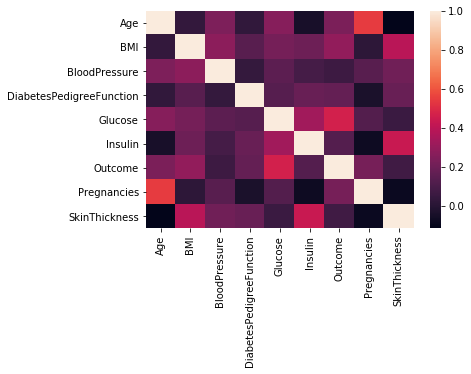

In [25]:
sns.heatmap(df.corr())

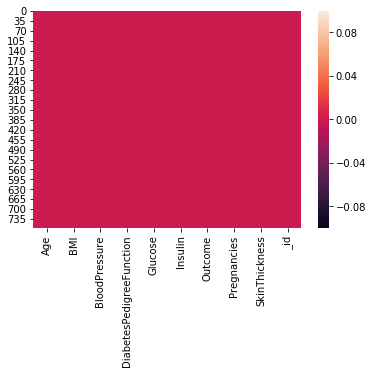

In [26]:
sns.heatmap(df.isnull())

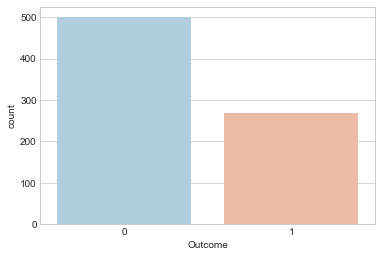

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df,palette='RdBu_r')

Text(0.5,1,'Pie chart')

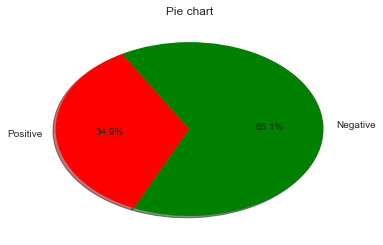

In [28]:
channels = ['Positive','Negative']
cols=['red','green']
slices = [pos,neg]
plt.pie(slices,labels=channels,colors=cols,shadow=True,autopct='%1.1f%%',startangle=120)
plt.title('Pie chart')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAFFF7E9E8>,
      dtype=object)

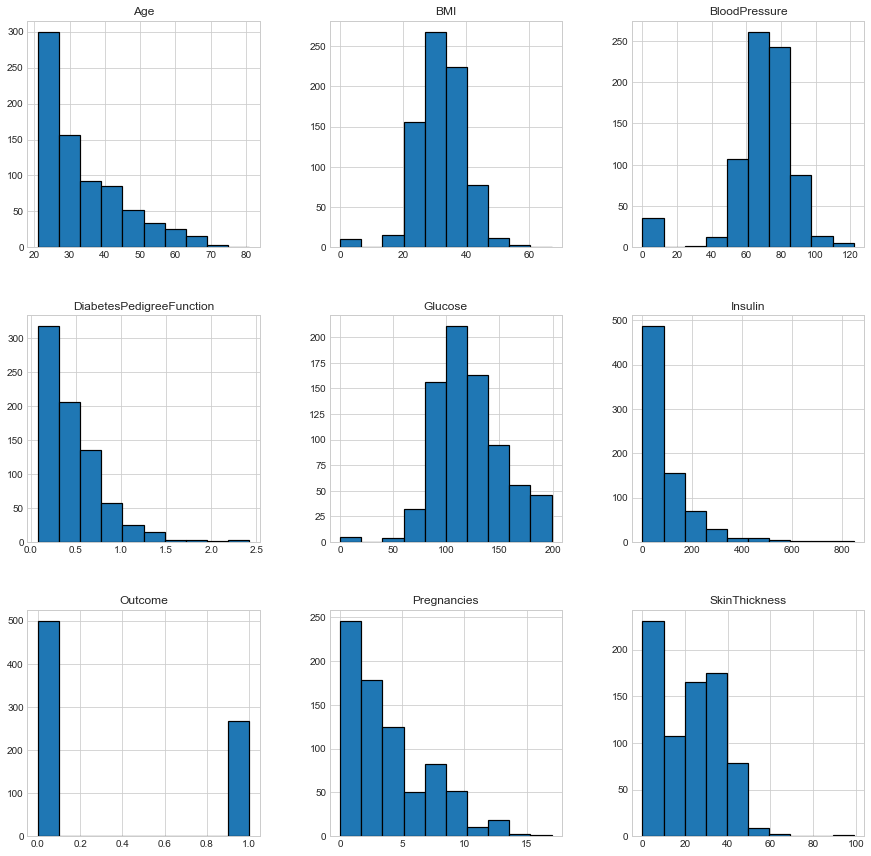

In [29]:
df.hist(edgecolor='black',figsize=([15,15]),linewidth=1.2)

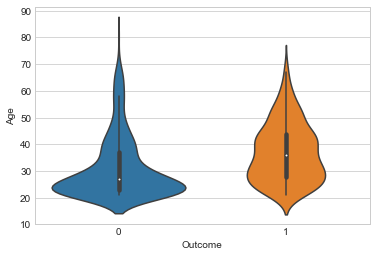

In [30]:
sns.violinplot(data=df,x=df['Outcome'],y=df['Age'])

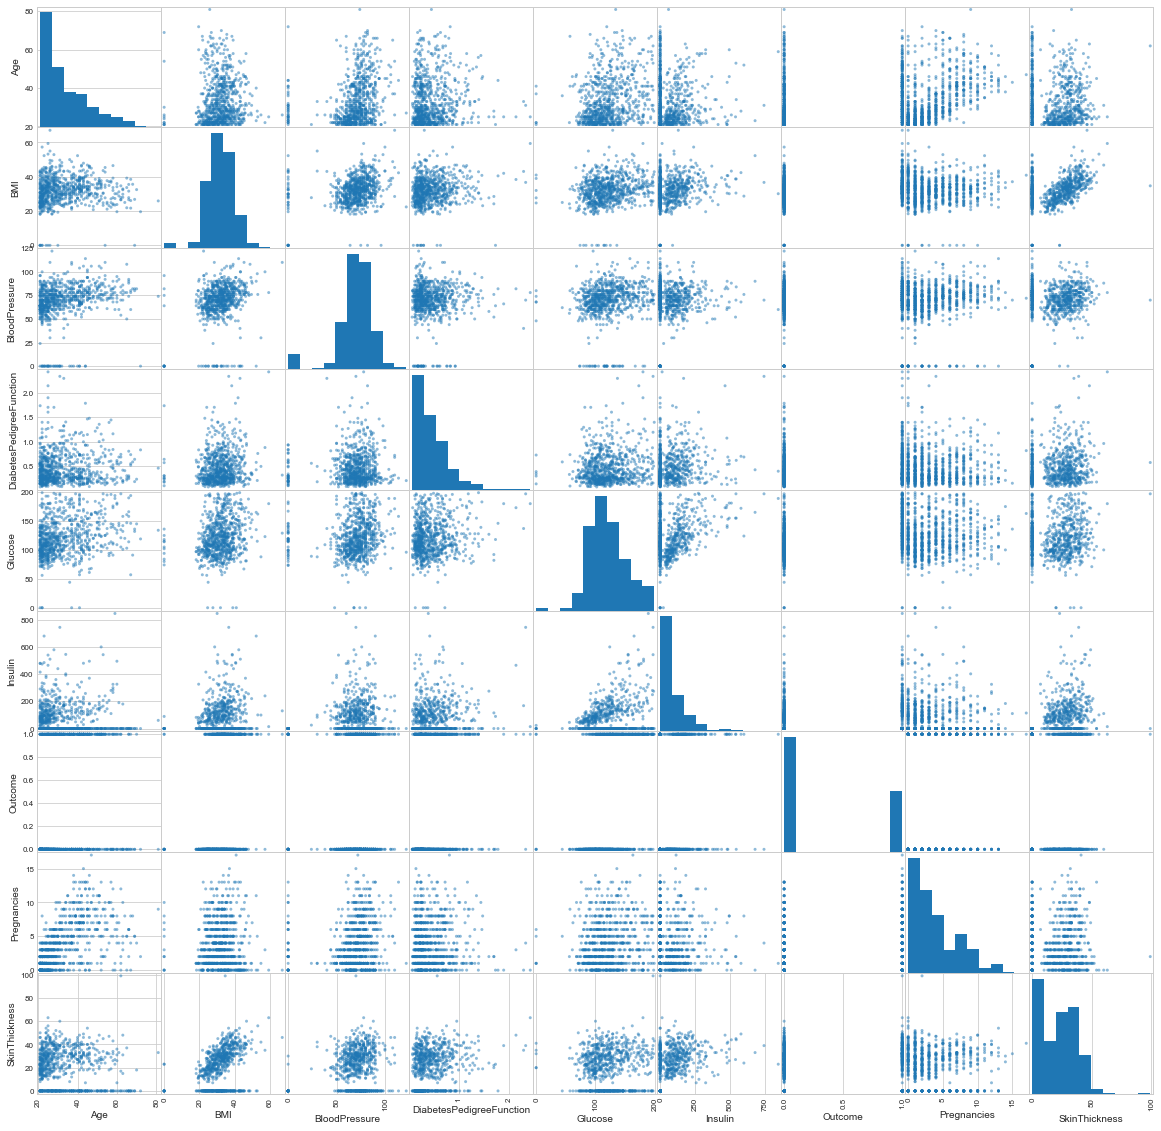

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))
plt.show()

F:\AnacondaFiles\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


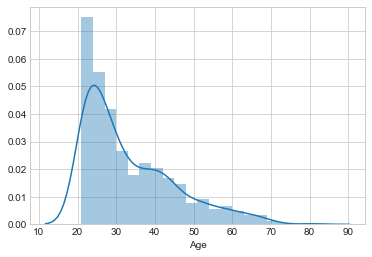

In [32]:
sns.distplot(df['Age'],bins=20)

F:\AnacondaFiles\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


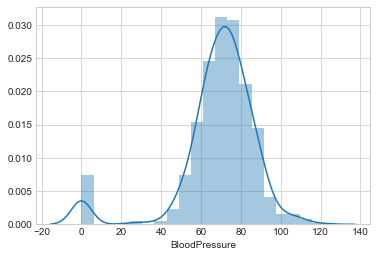

In [33]:
sns.distplot(df['BloodPressure'],bins=20)

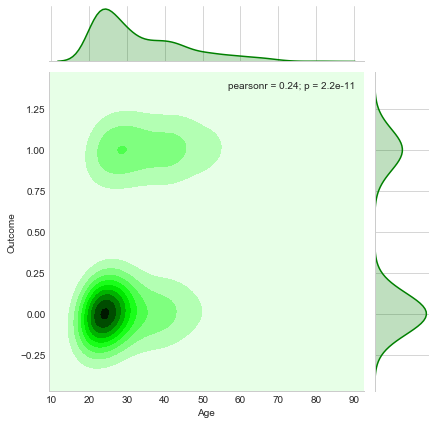

In [34]:
sns.jointplot(x='Age',y='Outcome',data=df,kind="kde", color="green")

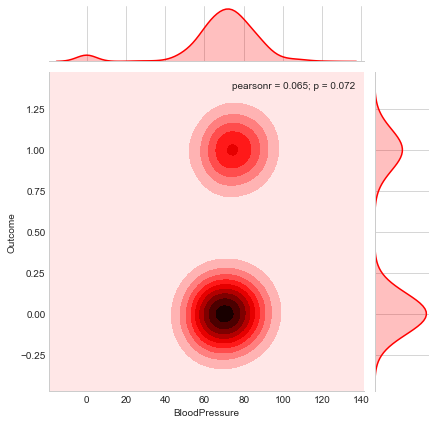

In [35]:
sns.jointplot(x='BloodPressure',y='Outcome',data=df,color='red',kind='kde')

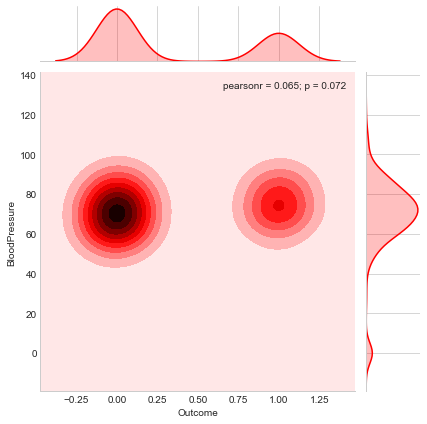

In [36]:
sns.jointplot(x='Outcome',y='BloodPressure',data=df,color='red',kind='kde')

F:\AnacondaFiles\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\AnacondaFiles\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


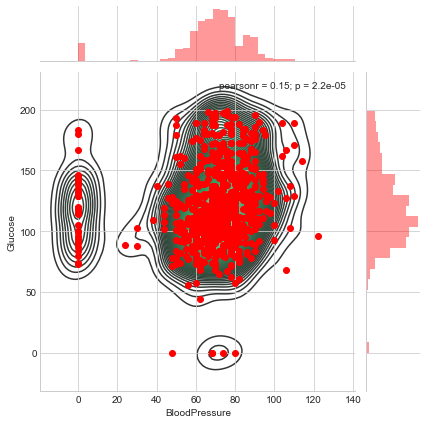

In [37]:
g = (sns.jointplot(x='BloodPressure',y='Glucose',data=df,color='red').plot_joint(sns.kdeplot,zorder=0,n_levels=100))

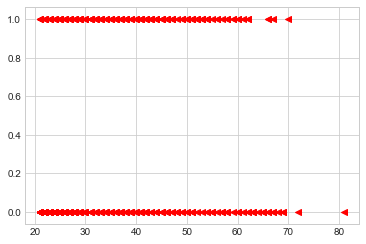

In [38]:
plt.scatter(df['Age'],df['Outcome'],label='scatter',color="red",marker='<')

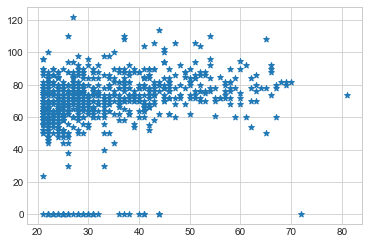

In [39]:
plt.scatter(df['Age'],df['BloodPressure'],label='scatter',marker='*')

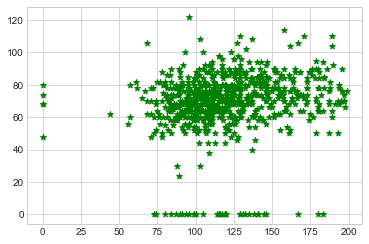

In [40]:
plt.scatter(df['Glucose'],df['BloodPressure'],color="green",label='scatter',marker='*')

In [41]:
df.columns

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Outcome', 'Pregnancies', 'SkinThickness', '_id'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Age                         768 non-null int64
BMI                         768 non-null float64
BloodPressure               768 non-null int64
DiabetesPedigreeFunction    768 non-null float64
Glucose                     768 non-null int64
Insulin                     768 non-null int64
Outcome                     768 non-null int64
Pregnancies                 768 non-null int64
SkinThickness               768 non-null int64
_id                         768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [43]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [44]:
df['_id']

0      5f049fd03eba3bcfeab8774b
1      5f049fd03eba3bcfeab8774c
2      5f049fd03eba3bcfeab8774d
3      5f049fd03eba3bcfeab8774e
4      5f049fd03eba3bcfeab8774f
5      5f049fd03eba3bcfeab87750
6      5f049fd03eba3bcfeab87751
7      5f049fd03eba3bcfeab87752
8      5f049fd03eba3bcfeab87753
9      5f049fd03eba3bcfeab87754
10     5f049fd03eba3bcfeab87755
11     5f049fd03eba3bcfeab87756
12     5f049fd03eba3bcfeab87757
13     5f049fd03eba3bcfeab87758
14     5f049fd03eba3bcfeab87759
15     5f049fd03eba3bcfeab8775a
16     5f049fd03eba3bcfeab8775b
17     5f049fd03eba3bcfeab8775c
18     5f049fd03eba3bcfeab8775d
19     5f049fd03eba3bcfeab8775e
20     5f049fd03eba3bcfeab8775f
21     5f049fd03eba3bcfeab87760
22     5f049fd03eba3bcfeab87761
23     5f049fd03eba3bcfeab87762
24     5f049fd03eba3bcfeab87763
25     5f049fd03eba3bcfeab87764
26     5f049fd03eba3bcfeab87765
27     5f049fd03eba3bcfeab87766
28     5f049fd03eba3bcfeab87767
29     5f049fd03eba3bcfeab87768
                 ...           
738    5

In [163]:
y = df['Outcome']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [164]:
x = df.drop(['Outcome','_id'],axis=1)
x.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,21,28.1,66,0.167,89,94,1,23
1,33,43.1,40,2.288,137,168,0,35
2,30,25.6,74,0.201,116,0,5,0
3,26,31.0,50,0.248,78,88,3,32
4,29,35.3,0,0.134,115,0,10,0


In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Age                         768 non-null int64
BMI                         768 non-null float64
BloodPressure               768 non-null int64
DiabetesPedigreeFunction    768 non-null float64
Glucose                     768 non-null int64
Insulin                     768 non-null int64
Pregnancies                 768 non-null int64
SkinThickness               768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# Univariate Selection

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
bestFeatures = SelectKBest(score_func=chi2,k="all")
fit = bestFeatures.fit(x,y)

In [50]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [51]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']

In [52]:
featureScores

,Specs,Score
0,Age,181.303689
1,BMI,127.669343
2,BloodPressure,17.605373
3,DiabetesPedigreeFunction,5.392682
4,Glucose,1411.887041
5,Insulin,2175.565273
6,Pregnancies,111.519691
7,SkinThickness,53.108040


In [53]:
featureScores.nlargest(6,"Score")

,Specs,Score
5,Insulin,2175.565273
4,Glucose,1411.887041
0,Age,181.303689
1,BMI,127.669343
6,Pregnancies,111.519691
7,SkinThickness,53.108040


# Feature Importance

In [152]:
from sklearn.ensemble import ExtraTreesClassifier

In [153]:
model = ExtraTreesClassifier()

In [154]:
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [155]:
model.feature_importances_

array([0.14101546, 0.13353684, 0.0976613 , 0.11894396, 0.24373849,
       0.07422531, 0.10964862, 0.08123002])

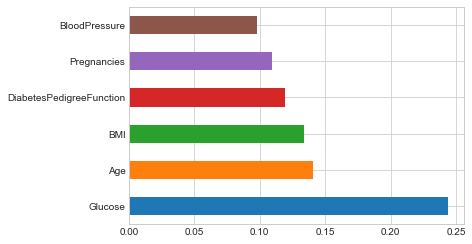

In [156]:
feat_improtance = pd.Series(model.feature_importances_,index=x.columns)
feat_improtance.nlargest(6).plot(kind="barh")
plt.show()

In [157]:
x = x.drop(['DiabetesPedigreeFunction','BloodPressure'],axis=1)

In [158]:
x.head()

,Age,BMI,Glucose,Insulin,Pregnancies,SkinThickness
0,21,28.1,89,94,1,23
1,33,43.1,137,168,0,35
2,30,25.6,116,0,5,0
3,26,31.0,78,88,3,32
4,29,35.3,115,0,10,0


In [159]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

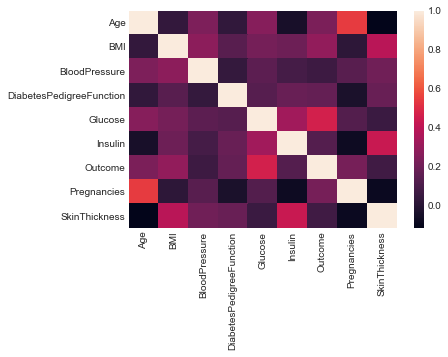

In [58]:
sns.heatmap(df.corr())

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
pridictor = DecisionTreeClassifier()

In [63]:
pridictor.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_pred = pridictor.predict(x_test)

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [100]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [86]:
y_pred = pridictor.predict([[21,28.1,89,94,1,23]])

In [87]:
y_pred

array([0], dtype=int64)

In [88]:
y_pred = pridictor.predict([[33,43.1,137,168,0,35]])

In [89]:
y_pred

array([1], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [102]:
y_test.count()

154

In [67]:
confusion_matrix(y_test,y_pred)

array([[77, 24],
       [22, 31]], dtype=int64)

In [68]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.76      0.77       101\n           1       0.56      0.58      0.57        53\n\n    accuracy                           0.70       154\n   macro avg       0.67      0.67      0.67       154\nweighted avg       0.70      0.70      0.70       154\n'

In [69]:
from sklearn.metrics import accuracy_score 

In [70]:
accuracy_score(y_test,y_pred)

0.7012987012987013

In [108]:
from sklearn import tree

In [111]:
fn = ['Insulin','Glucose','Age','BMI','Pregnancies','SkinThickness']
outcome =['1','0']

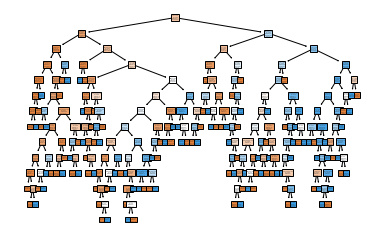

In [112]:
tree.plot_tree(pridictor,feature_names = fn, class_names=outcome,filled = True);

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logiModel = LogisticRegression()

In [102]:
logiModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = logiModel.predict(x_test)

In [104]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [105]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [95]:
y_pred = pridictor.predict([[21,28.1,89,94,1,23]])

In [96]:
y_pred

array([0], dtype=int64)

In [97]:
y_pred = pridictor.predict([[33,43.1,137,168,0,35]])

In [98]:
y_pred

array([1], dtype=int64)

In [106]:
confusion_matrix(y_test,y_pred)

array([[87, 14],
       [24, 29]], dtype=int64)

In [107]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [108]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.86      0.82       101\n           1       0.67      0.55      0.60        53\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.70      0.71       154\nweighted avg       0.75      0.75      0.75       154\n'

# SVM

In [109]:
from sklearn.svm import SVC

In [110]:
svmModel = SVC(kernel='rbf')

In [111]:
svmModel.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
y_pred = svmModel.predict(x_test)

In [113]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [118]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [97]:
y_pred = pridictor.predict([[21,28.1,89,94,1,23]])

In [98]:
y_pred

array([0], dtype=int64)

In [99]:
y_pred = pridictor.predict([[33,43.1,137,168,0,35]])

In [100]:
y_pred

array([1], dtype=int64)

In [114]:
confusion_matrix(y_test,y_pred)

array([[92,  9],
       [28, 25]], dtype=int64)

In [115]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.91      0.83       101\n           1       0.74      0.47      0.57        53\n\n    accuracy                           0.76       154\n   macro avg       0.75      0.69      0.70       154\nweighted avg       0.76      0.76      0.74       154\n'

In [116]:
accuracy_score(y_test,y_pred)

0.7597402597402597

# RandomForest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfc = RandomForestClassifier(n_estimators=100)

In [124]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
y_pred = rfc.predict(x_test)

In [126]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [112]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [113]:
y_pred = pridictor.predict([[21,28.1,89,94,1,23]])

In [114]:
y_pred

array([0], dtype=int64)

In [115]:
y_pred = pridictor.predict([[33,43.1,137,168,0,35]])

In [116]:
y_pred

array([1], dtype=int64)

In [127]:
confusion_matrix(y_test,y_pred)

array([[81, 20],
       [21, 32]], dtype=int64)

In [128]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.80       101\n           1       0.62      0.60      0.61        53\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.70      0.70       154\nweighted avg       0.73      0.73      0.73       154\n'

In [129]:
accuracy_score(y_test,y_pred)

0.7337662337662337

# Apply Feature Importance Columns

In [165]:
df.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,_id
0,21,28.1,66,0.167,89,94,0,1,23,5f049fd03eba3bcfeab8774b
1,33,43.1,40,2.288,137,168,1,0,35,5f049fd03eba3bcfeab8774c
2,30,25.6,74,0.201,116,0,0,5,0,5f049fd03eba3bcfeab8774d
3,26,31.0,50,0.248,78,88,1,3,32,5f049fd03eba3bcfeab8774e
4,29,35.3,0,0.134,115,0,0,10,0,5f049fd03eba3bcfeab8774f


In [166]:
x = df.drop(['SkinThickness','_id','Outcome','Insulin'],axis=1)

In [167]:
x.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Pregnancies
0,21,28.1,66,0.167,89,1
1,33,43.1,40,2.288,137,0
2,30,25.6,74,0.201,116,5
3,26,31.0,50,0.248,78,3
4,29,35.3,0,0.134,115,10


In [168]:
y =  df.Outcome

In [169]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Apply Decision tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
cd2 = DecisionTreeClassifier()

In [184]:
cd2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
y_pred = cd2.predict(x_test)

In [186]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [187]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 

In [188]:
confusion_matrix(y_test,y_pred)

array([[76, 25],
       [23, 30]], dtype=int64)

In [189]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.75      0.76       101\n           1       0.55      0.57      0.56        53\n\n    accuracy                           0.69       154\n   macro avg       0.66      0.66      0.66       154\nweighted avg       0.69      0.69      0.69       154\n'

In [190]:
accuracy_score(y_test,y_pred)

0.6883116883116883

# Apply Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
logModel = LogisticRegression()

In [193]:
logModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
y_pred= logModel.predict(x_test)

In [200]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [201]:
confusion_matrix(y_test,y_pred)

array([[89, 12],
       [26, 27]], dtype=int64)

In [202]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.88      0.82       101\n           1       0.69      0.51      0.59        53\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.70      0.71       154\nweighted avg       0.75      0.75      0.74       154\n'

In [203]:
accuracy_score(y_test,y_pred)

0.7532467532467533

# Apply SVM 

In [204]:
from sklearn.svm import SVC

In [205]:
svmModel = SVC(kernel='rbf')

In [206]:
svmModel.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
y_pred = logModel.predict(x_test)

In [209]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [210]:
confusion_matrix(y_test,y_pred)

array([[89, 12],
       [26, 27]], dtype=int64)

In [211]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.88      0.82       101\n           1       0.69      0.51      0.59        53\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.70      0.71       154\nweighted avg       0.75      0.75      0.74       154\n'

In [212]:
accuracy_score(y_test,y_pred)

0.7532467532467533

# Apply RandomForest 

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
rmfc = RandomForestClassifier(n_estimators=100)

In [215]:
rmfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [216]:
y_pred = rmfc.predict(x_test)

In [217]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [218]:
confusion_matrix(y_test,y_pred)

array([[88, 13],
       [21, 32]], dtype=int64)

In [219]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.87      0.84       101\n           1       0.71      0.60      0.65        53\n\n    accuracy                           0.78       154\n   macro avg       0.76      0.74      0.75       154\nweighted avg       0.77      0.78      0.77       154\n'

In [220]:
accuracy_score(y_test,y_pred)

0.7792207792207793

# Correlation Analysis

In [230]:
df.corr()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
Age,1.000000,0.036242,0.239528,0.033561,0.263514,-0.042163,0.238356,0.544341,-0.113970
BMI,0.036242,1.000000,0.281805,0.140647,0.221071,0.197859,0.292695,0.017683,0.392573
BloodPressure,0.239528,0.281805,1.000000,0.041265,0.152590,0.088933,0.065068,0.141282,0.207371
DiabetesPedigreeFunction,0.033561,0.140647,0.041265,1.000000,0.137337,0.185071,0.173844,-0.033523,0.183928
Glucose,0.263514,0.221071,0.152590,0.137337,1.000000,0.331357,0.466581,0.129459,0.057328
Insulin,-0.042163,0.197859,0.088933,0.185071,0.331357,1.000000,0.130548,-0.073535,0.436783
Outcome,0.238356,0.292695,0.065068,0.173844,0.466581,0.130548,1.000000,0.221898,0.074752
Pregnancies,0.544341,0.017683,0.141282,-0.033523,0.129459,-0.073535,0.221898,1.000000,-0.081672
SkinThickness,-0.113970,0.392573,0.207371,0.183928,0.057328,0.436783,0.074752,-0.081672,1.000000


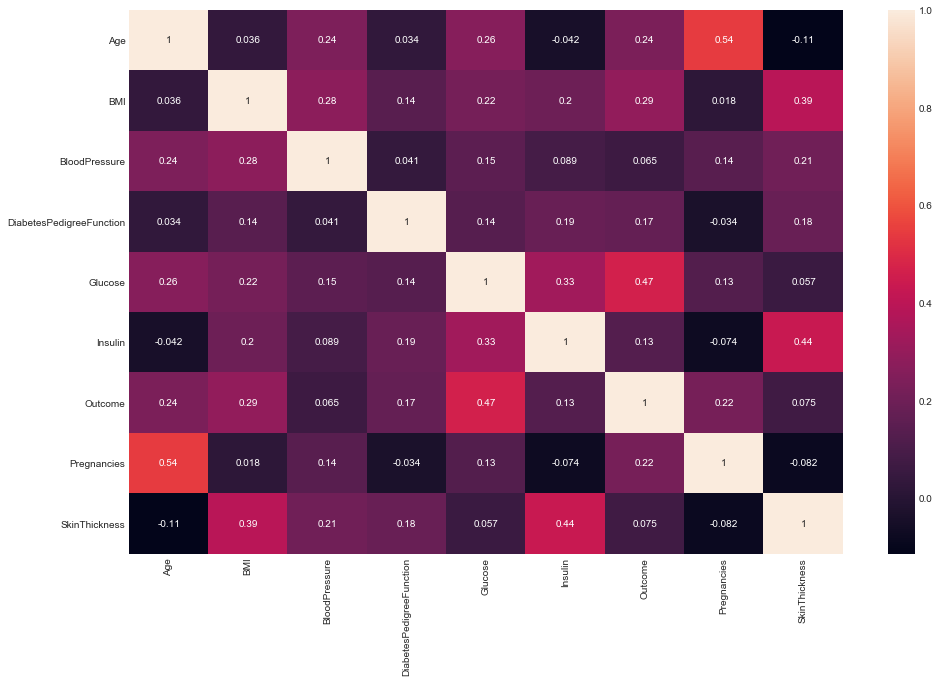

In [231]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [254]:
x =df.drop(['BloodPressure','SkinThickness'],axis=1)

In [255]:
y = df['Outcome']

In [256]:
x.head()

,Age,BMI,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,_id
0,21,28.1,0.167,89,94,0,1,5f049fd03eba3bcfeab8774b
1,33,43.1,2.288,137,168,1,0,5f049fd03eba3bcfeab8774c
2,30,25.6,0.201,116,0,0,5,5f049fd03eba3bcfeab8774d
3,26,31.0,0.248,78,88,1,3,5f049fd03eba3bcfeab8774e
4,29,35.3,0.134,115,0,0,10,5f049fd03eba3bcfeab8774f


In [257]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [258]:
x=x.drop(['_id'],axis=1)

In [259]:
x.head()

,Age,BMI,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies
0,21,28.1,0.167,89,94,0,1
1,33,43.1,2.288,137,168,1,0
2,30,25.6,0.201,116,0,0,5
3,26,31.0,0.248,78,88,1,3
4,29,35.3,0.134,115,0,0,10


In [260]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Applying the Decision Tree Classification

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
cd3 = DecisionTreeClassifier()

In [263]:
cd3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [264]:
y_pred = cd3.predict(x_test)

In [265]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [266]:
confusion_matrix(y_test,y_pred)

array([[101,   0],
       [  0,  53]], dtype=int64)

In [267]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       101\n           1       1.00      1.00      1.00        53\n\n    accuracy                           1.00       154\n   macro avg       1.00      1.00      1.00       154\nweighted avg       1.00      1.00      1.00       154\n'

In [268]:
accuracy_score(y_test,y_pred)

1.0

# Applying Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression

In [273]:
logModelco = LogisticRegression()

In [274]:
logModelco.fit(x_train,y_train)

F:\AnacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
y_pred = logModelco.predict(x_test)

In [276]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [277]:
confusion_matrix(y_test,y_pred)

array([[101,   0],
       [  0,  53]], dtype=int64)

In [278]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       101\n           1       1.00      1.00      1.00        53\n\n    accuracy                           1.00       154\n   macro avg       1.00      1.00      1.00       154\nweighted avg       1.00      1.00      1.00       154\n'

In [279]:
accuracy_score(y_test,y_pred)

1.0

# Applying SVM 

In [280]:
from sklearn.svm import SVC

In [282]:
svmModelco = SVC(kernel='rbf')

In [283]:
svmModelco.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [284]:
y_pred = svmModelco.predict(x_test)

In [285]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [286]:
confusion_matrix(y_test,y_pred)

array([[93,  8],
       [28, 25]], dtype=int64)

In [287]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.92      0.84       101\n           1       0.76      0.47      0.58        53\n\n    accuracy                           0.77       154\n   macro avg       0.76      0.70      0.71       154\nweighted avg       0.76      0.77      0.75       154\n'

In [288]:
accuracy_score(y_test,y_pred)

0.7662337662337663

# Applying Random Forest

In [293]:
from sklearn.ensemble import RandomForestClassifier

In [294]:
rmfco = RandomForestClassifier(n_estimators=100)

In [295]:
rmfco.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [296]:
y_pred = rmfco.predict(x_test)

In [297]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [298]:
confusion_matrix(y_test,y_pred)

array([[101,   0],
       [  0,  53]], dtype=int64)

In [299]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       101\n           1       1.00      1.00      1.00        53\n\n    accuracy                           1.00       154\n   macro avg       1.00      1.00      1.00       154\nweighted avg       1.00      1.00      1.00       154\n'

In [300]:
accuracy_score(y_test,y_pred)

1.0

# Thank You